In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_colwidth',10000)

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [3]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords

import re
import string

### Documents Cleanup for Metadata

In [4]:
df = pd.read_csv('data/article_info_6000.csv')

In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df.dropna(subset=['title','description'],inplace=True)

In [7]:
df.head()

,content,description,publishedAt,source,title,url
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11


In [8]:
df['publish_date'] = df.publishedAt.apply(lambda x: x.split('T')[0])
df.head()

,content,description,publishedAt,source,title,url,publish_date
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",2018-11-04T03:58:49Z,Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",2018-11-06T06:06:33Z,Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",2018-11-05T04:51:58Z,Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,2018-11-07T13:42:30Z,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",2018-11-08T11:16:43Z,Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08


In [9]:
date_counts = df.publish_date.value_counts()

In [10]:
date_counts.set_axis(pd.to_datetime(date_counts.index),inplace=True)

In [11]:
date_counts.sort_index(axis=0,inplace=True)

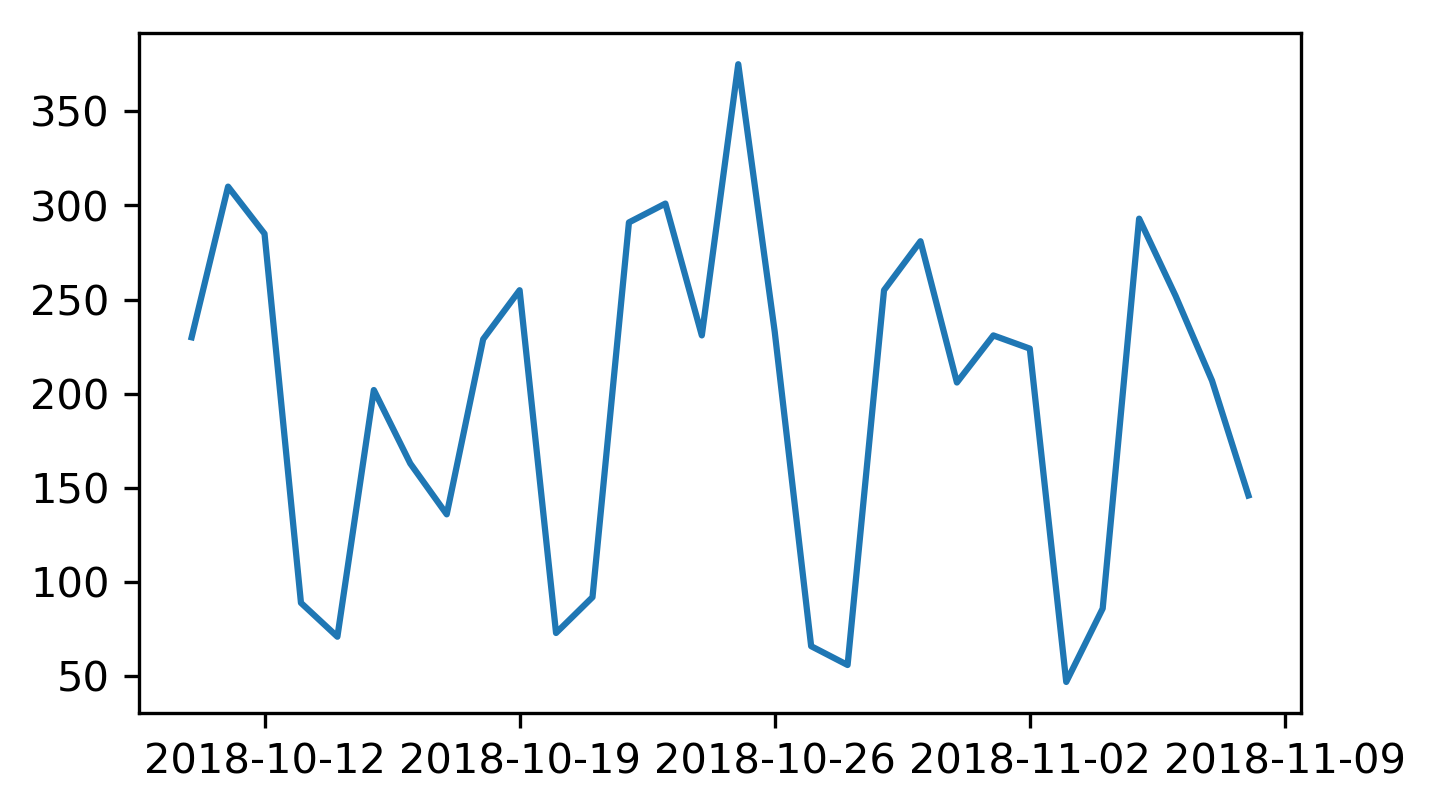

In [12]:
plt.figure(figsize=(5,3),dpi=300)
plt.plot(date_counts.index, date_counts, );

In [13]:
df.drop('publishedAt',axis=1,inplace=True)

In [14]:
df.head()

,content,description,source,title,url,publish_date
0,"SHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for boomi… [+4558 chars]","Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04
1,"ZHUHAI, China (Reuters) - Europe’s Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer’s China head saying there would be “no winner” from a prolonged economic c… [+519 chars]","Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06
2,"SYDNEY (Reuters) - Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit. Mar… [+4073 chars]","Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05
3,"(Bloomberg) -- U.S. equity futures jumped, the dollar dropped and Treasuries climbed as investors seemed to cheer on an outlook for political gridlock in the wake of the American midterm elections. Risky assets were in favor after results showed Democrats win… [+4044 chars]",The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07
4,"A US trade war, Brexit, Italy — you name it, Germany's economy is suffering from it. Europe's economic powerhouse is in one of the longest boom phases of the postwar period, but it's being pounded by a cocktail of international events that ING Economics says … [+2262 chars]","Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08


In [15]:
source_counts = df.source.value_counts()
small_media = source_counts[source_counts < 10].index.format()
df.loc[df.source.apply(lambda x: x in small_media), 'source'] = 'Small Media'

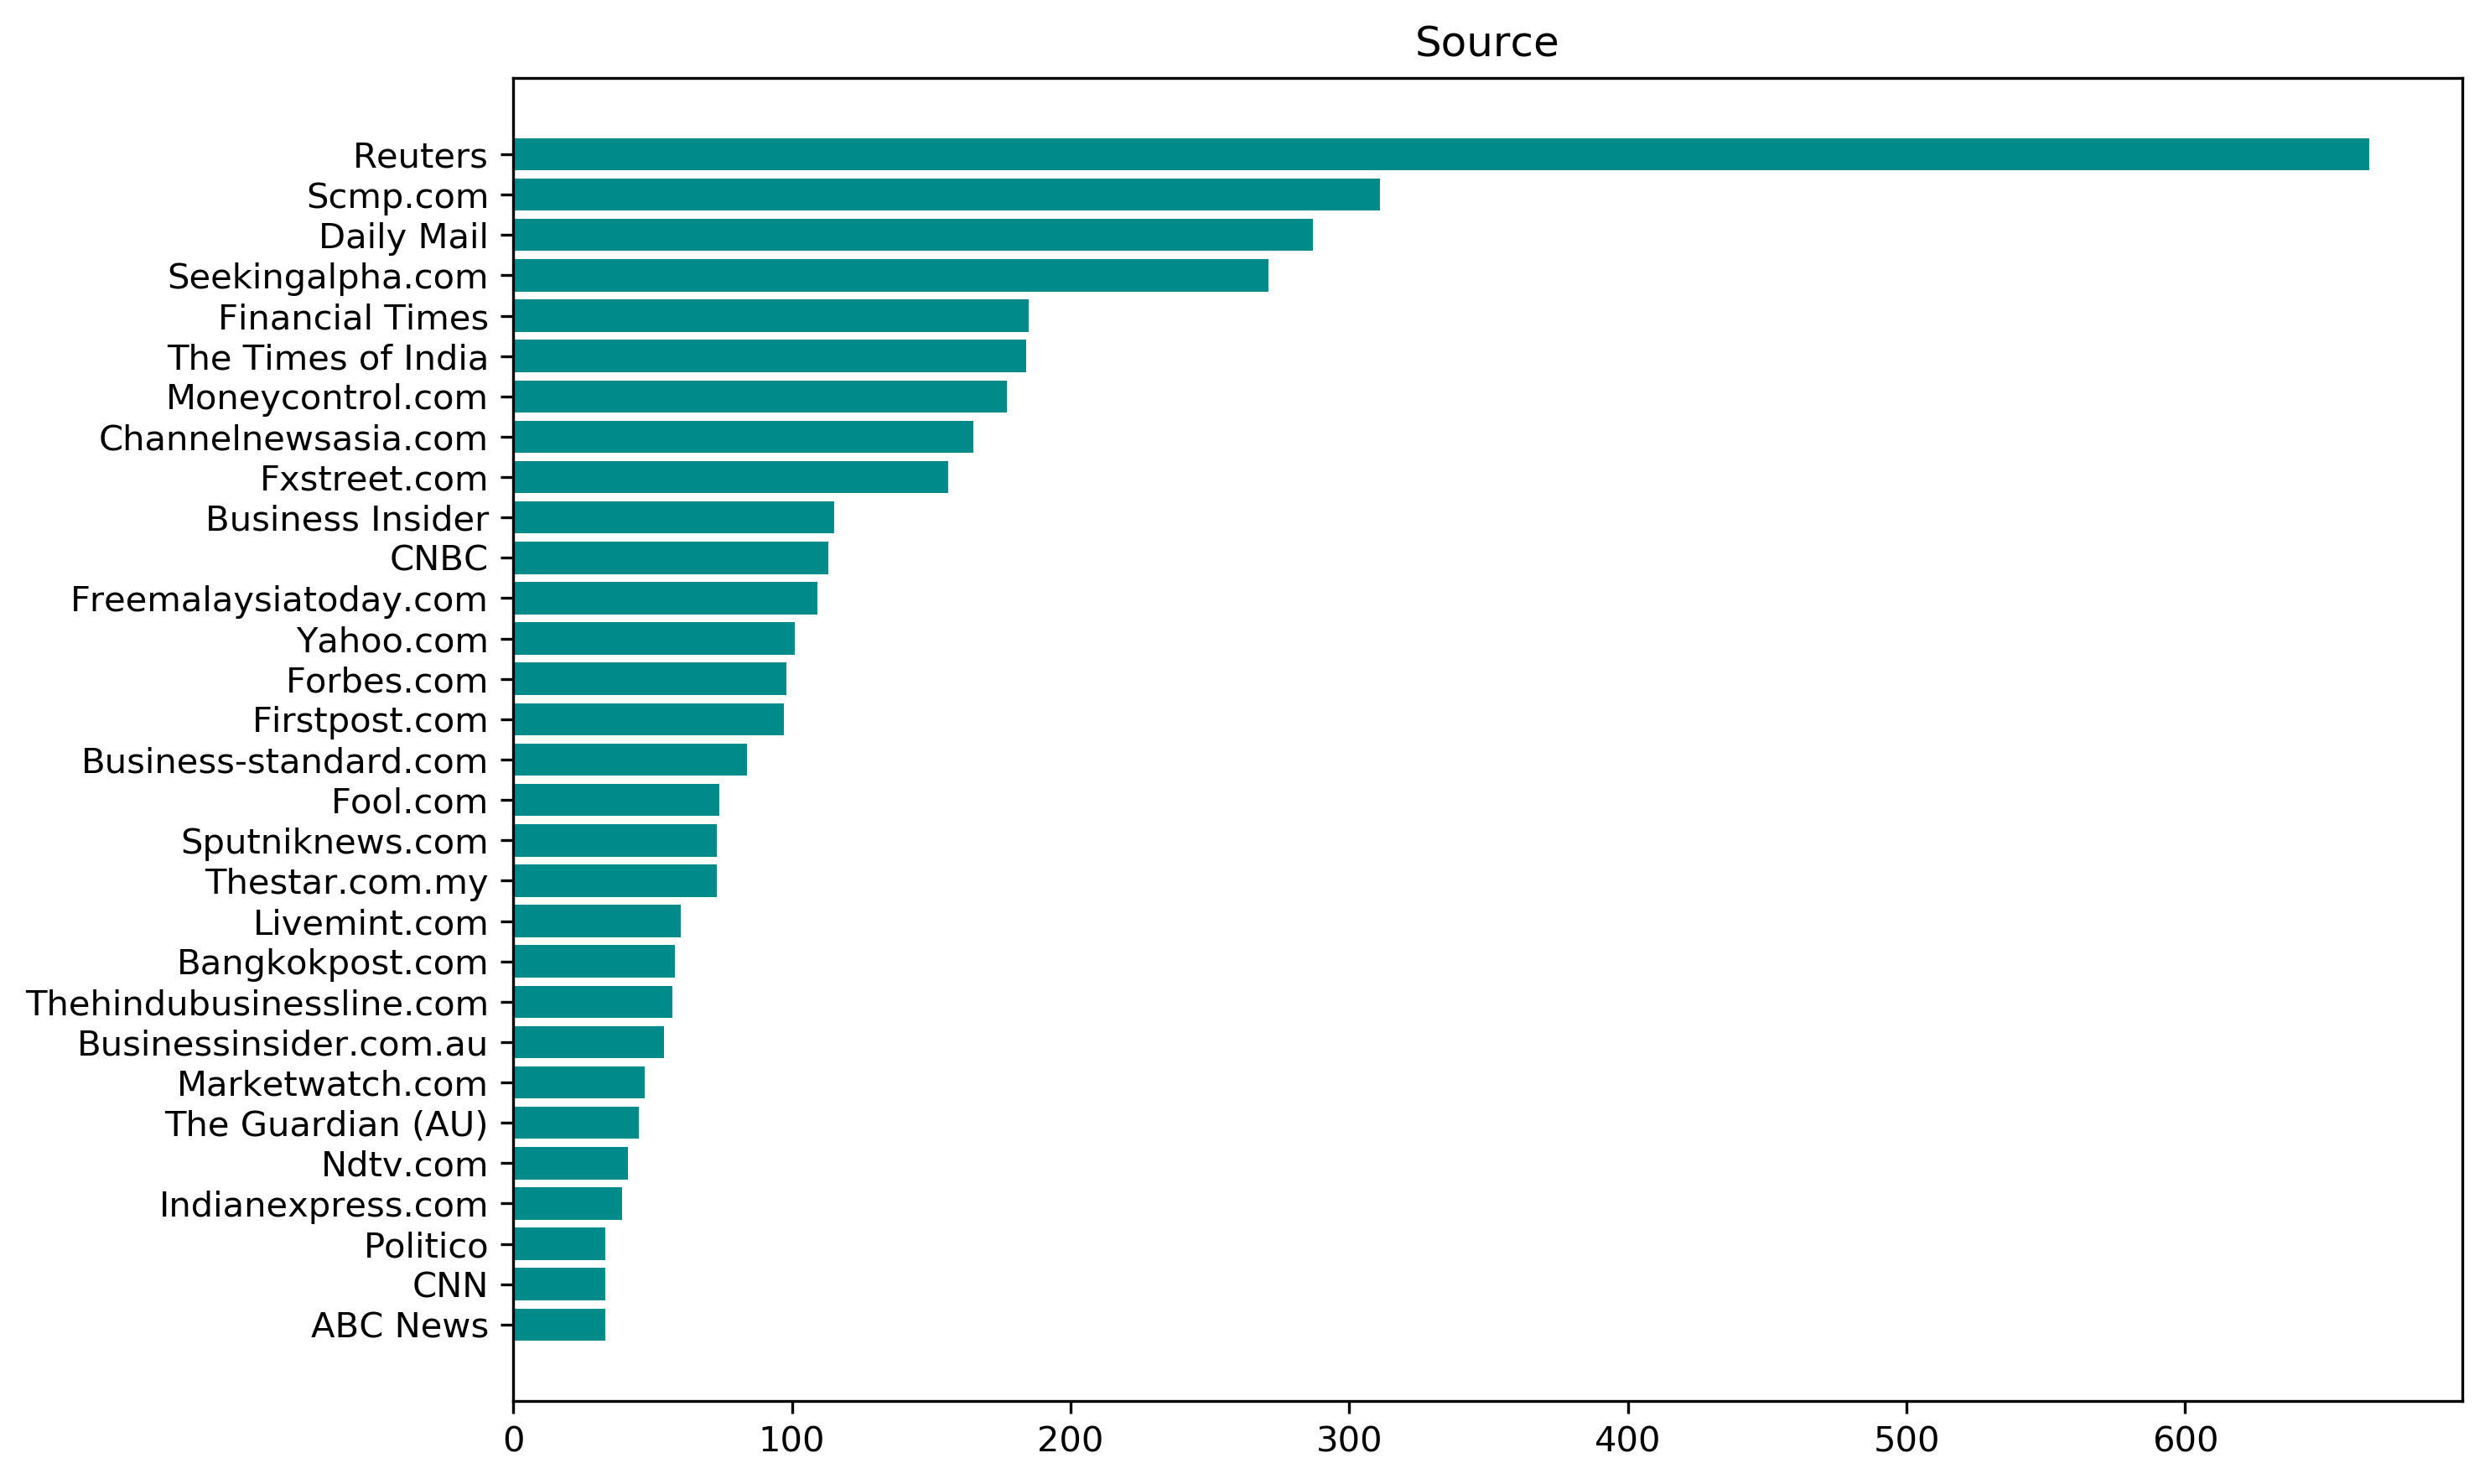

In [16]:
plt.figure(figsize=(10,6), dpi=300)
source_counts = df.source.value_counts()[30:0:-1]
plt.barh(source_counts.index, source_counts,color='darkcyan')
plt.title('Source')
plt.tight_layout();

### Document Cleaning for Full Articles

In [17]:
df_content = pd.read_csv('data/full_content(full).csv')

In [18]:
df_content.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
doc1 = '5 Min Read\nSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. \nThe biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. \nBut analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. \nWhile the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. \nBoeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. \n“We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.” \nChina has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade. \nBut China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation. \nAnd while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers. \nThe United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. \n“It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” \n“In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” \nSo far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. \nRecent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. \nBeijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. \n“Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. \nU.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. \nChina is expected to put on a show of strength in space and defense, with self-developed fighter training FTC-2000 aircraft, a historically high number of weapons as well as its latest unmanned aerial vehicles among the kit on display. \nChina’s air force said on Friday that a number of Chengdu J-20 stealth fighters would perform demo flights, after having debuted at the show two years ago with a 60-second flypast. \nKelvin Wong, senior Asia Pacific defense technology expert at IHS Markit, said this would be part of the deliberate messaging often associated with the closely watched show. \n“It appears the PLA (People’s Liberation Army) is definitely showcasing its growing confidence in the latest J-20 combat aircraft,” said Wong. \nReporting by Brenda Goh and Stella Qiu; Additional Reporting by Tim Hepher in HONG KONG; Writing by Brenda Goh; Editing by Muralikumar Anantharaman\nAll quotes delayed a minimum of 15 minutes. See here for a complete list of exchanges and delays.\n© 2018 Reuters. All Rights Reserved.'

In [20]:
def clean_content(doc):
    doc = re.sub('\\n','',doc)
    doc = ' '.join(doc.split()[:2000])
    return doc

In [21]:
clean_content(doc1)

'5 Min ReadSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. The biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. But analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. While the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be t

In [22]:
df_content.head()

full_content
0  5 Min Read\nSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. \nThe biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries.  \nBut analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. \nWhile the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. \nBoeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. \n“We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.”  \nChina has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade.  \nBut China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation.  \nAnd while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers.   \nThe United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. \n“It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” \n“In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” \nSo far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. \nRecent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. \nBeijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. \n“Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. \nU.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. \nChina is expected to put

In [23]:
non_null = df_content.full_content.isna() == False

In [24]:
df_content.loc[non_null,'full_content'] = df_content[non_null]['full_content'].apply(clean_content)

In [25]:
df.loc[:,'content'] = df_content.loc[:,'full_content']

In [26]:
df.head()

content  \
0  5 Min ReadSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. The biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. But analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. While the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. Boeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. “We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.” China has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade. But China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation. And while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers. The United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. “It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” “In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” So far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. Recent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. Beijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. “Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. U.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. China is expected to put on a show of strength in space and defense,

In [27]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 6 columns):
content         5891 non-null object
description     5891 non-null object
source          5891 non-null object
title           5891 non-null object
url             5891 non-null object
publish_date    5891 non-null object
dtypes: object(6)
memory usage: 276.2+ KB


In [29]:
df.head(2)

content  \
0  5 Min ReadSHANGHAI/BEIJING (Reuters) - Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China’s largest aerospace meeting this week, as suppliers consider what the country’s slowing economy could mean for booming jet demand. The biennial Airshow China, to be held in the coastal city of Zhuhai during Nov 6-11, is traditionally an event for Beijing to parade its growing aviation prowess in front of aerospace executives, diplomats and arms buyers from over 40 countries. But analysts say they are not expecting many headline announcements or big deals this year as a bruising trade war between Beijing and Washington and a slowing Chinese economy cause companies to be cautious. While the tarmac will be filled with planes from the likes of Airbus SA (AIR.PA) and Embraer (EMBR3.SA), the main symbol of China’s own commercial aviation ambitions, the Commercial Aircraft Corp of China’s (COMAC) [CMAFC.UL] C919 narrowbody jet, will not be there. A senior executive said it was undergoing test flights. Boeing Co (BA.N), which is opening a 737 completion plant in China, will not display any of its planes but only models at its exhibition stand. “We’re not expecting a big turnout this year,” said Chinese aviation expert Li Xiaojin. “As you know the Chinese economy is not doing great this year, so companies that would normally send 10 people will only send five instead.” China has become a key hunting ground for foreign firms to do deals as its airlines have expanded fleets to keep up with surging travel demand, putting the country in a position to overtake the United States as the world’s top aviation market in the next decade. But China’s economic growth has weakened to its slowest pace since the financial crisis and its relations with other countries have been tested by Beijing’s ambitions to grow its own domestic champions in industries such as aviation. And while U.S.-made aircraft have so far escaped Beijing’s tariffs, analysts said they were still waiting to see what the trade war would spell for U.S. companies such as Boeing, Honeywell (HON.N) and Gulfstream, who face fierce competition in China from the likes of Airbus and other suppliers. The United States exported $16.3 billion of civilian aircraft to China in 2017, the biggest category of goods it exported to China, according to a paper published by the Federal Reserve Bank of St. Louis. “It is not unlikely that China might strategically steer future aircraft purchases to Airbus rather than Boeing,” said Marc Szepan, a China aviation expert at the University of Oxford and former industry executive.” “In addition, there might be a re-evaluation of the relative attractiveness of industrial partners for China’s future aircraft programs such as the CR929 which might favor European over U.S. component and structures suppliers.” So far, Beijing has avoided showing its hand in either direction as deals by Chinese leasing firms to buy foreign aircraft are either pushed back or kept private. Recent U.S. allegations in court filings that Chinese intelligence attempted to steal information on a French-U.S. turbofan engine developed for commercial jetliners - a clear reference to the Safran-General Electric LEAP (SAF.PA) (GE.N) - could further fray relations, analysts said. Beijing has also criticized the U.S. decision not to send senior officials to a Shanghai import expo that takes place in the same week as the airshow and counts as one of China’s most important foreign policy events for the year. “Right now the political winds are quite concerning,” said aerospace analyst Richard Aboulafia of the Teal Group. U.S. President Donald Trump said on Friday that he will likely make a deal with China on trade, adding that a lot of progress had been made to resolve the two countries’ differences but warning that he still may impose more tariffs on Chinese goods. China is expected to put on a show of strength in space and defense,

### Tokenization

In [30]:
from textblob import TextBlob

from collections import Counter
from operator import itemgetter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
more_stopwords = [
    'trade',
    'war',
    'tariffs',
    'us',
    'amid',
    'chinese',
    'china',
    'president',
    'donald',
    'trump',
    'united',
    'states',
    'could',
    'year',
    'reuters',
    'news',
    'xi',
    'jinping',
    'beijing',
    'washington'
]

In [32]:
def cleanup_doc(doc):
    # Replace punctuations with a white space
    doc = re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)
    # Remove all words containing digits
    doc = re.sub('\w*\d\w*', ' ', doc)
    # Keep US as a special term
    doc = re.sub('U.S.', 'US', doc)
    # Change all words into lowercases
    doc = doc.lower()
    # Remove all non English characters
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w.isalpha())
    # Remove stopwords
    stop = stopwords.words('english')
    stop += more_stopwords
    stop = set(stop)
    doc = ' '.join(w for w in nltk.word_tokenize(doc) if w not in stop)
    
    return doc

In [33]:
def super_clean(collection):
    clean = []
    for c in collection:
        clean.append(cleanup_doc(c))
    return clean

In [34]:
content = df.title+' '+df.content

In [35]:
content = super_clean(content)

In [36]:
len(content)

5891

In [37]:
def find_top_bigrams(collection, num):
    counter = Counter()

    n = 2
    for c in collection:
        words = TextBlob(c).words
        bigrams = ngrams(words, n)
        counter += Counter(bigrams)

    res = []
    for phrase, count in counter.most_common(num):
        res_tuple = (" ".join(phrase), count)
        res.append(res_tuple)
    
    return res

In [38]:
cv = CountVectorizer(
                                strip_accents='ascii',
                                max_df=0.1, 
                                min_df=3,
                                ngram_range=(1,2)    
                               )

In [39]:
X = cv.fit_transform(content)

In [40]:
import dill

In [41]:
dill.dump(cv, open('data/vectors/cv_full', 'wb'))
dill.dump(X, open('data/matrix/X_cv_full', 'wb'))

In [42]:
X.toarray().shape

(5891, 171770)

In [43]:
vocab = np.array(cv.get_feature_names())
counts = X.toarray().sum(0)
vocab[np.argsort(-counts)[:100]]

array(['cent', 'per cent', 'apple', 'gold', 'vs', 'series', 'rs',
       'democrats', 'eu', 'iran', 'taiwan', 'revenue', 'hong kong',
       'military', 'gdp', 'series vs', 'women', 'futures', 'inflation',
       'congress', 'australia', 'steel', 'farmers', 'trillion', 'canada',
       'jobs', 'net', 'italy', 'credit', 'city', 'yields', 'republican',
       'pm', 'fxstreet', 'deficit', 'budget', 'mr', 'midterm',
       'republicans', 'euro', 'campaign', 'arabia', 'japanese', 'service',
       'saudi arabia', 'amazon', 'personal', 'rose percent', 'experience',
       'test', 'senate', 'brexit', 'twitter', 'barrel', 'korea', 'bond',
       'summit', 'democratic', 'investing', 'rally', 'region', 'imf',
       'brazil', 'auto', 'economist', 'consumers', 'nation', 'win',
       'pacific', 'order', 'session', 'visit', 'user', 'cuts', 'facebook',
       'profits', 'closed', 'alibaba', 'university', 'david',
       'volatility', 'copyright', 'singapore', 'relationship', 'strategy',
       'mex

In [44]:
counts

array([ 9, 27,  4, ..., 18,  3, 13], dtype=int64)

In [45]:
from collections import Counter

countfreq = np.array(Counter(counts).most_common()).T

In [46]:
[countfreq[0,:20]]

[array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20,
        19, 21, 23], dtype=int64)]

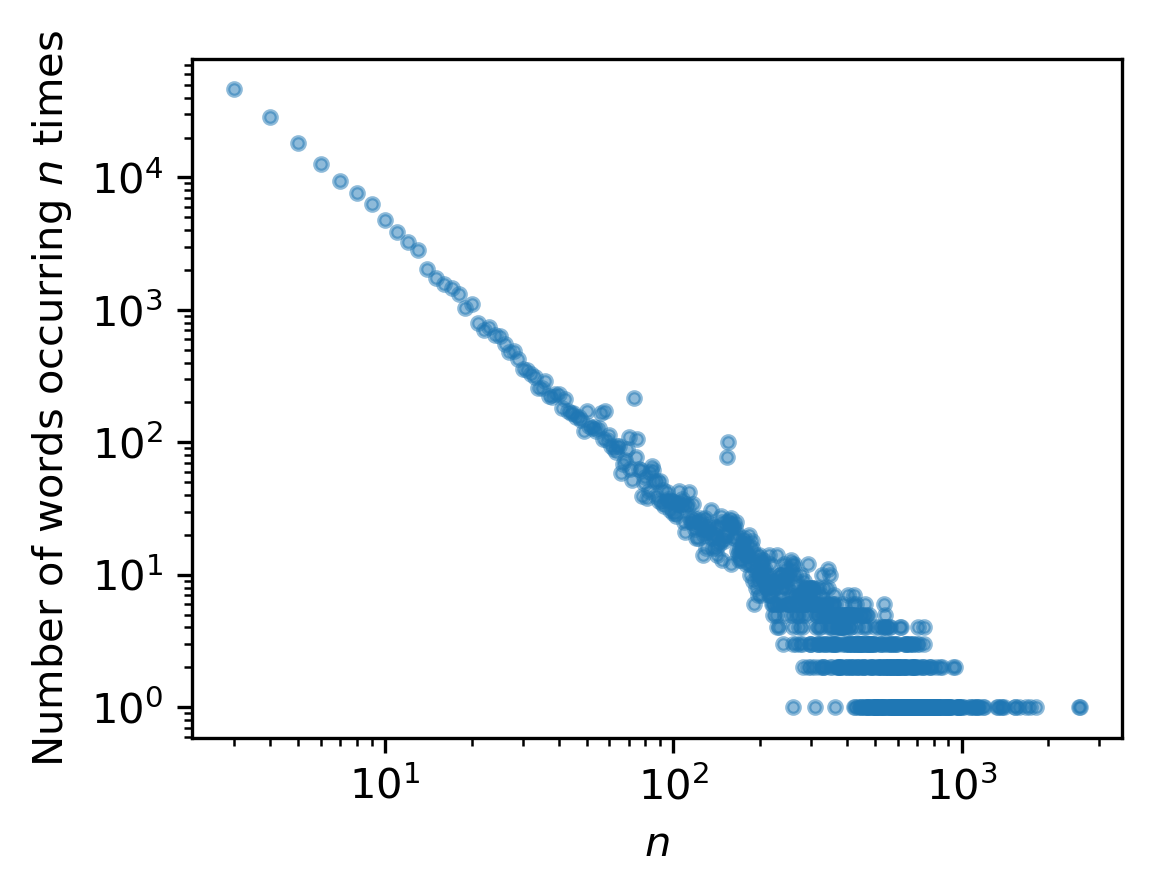

In [47]:
%config InlineBackend.figure_format = 'png'
plt.figure(dpi=300,figsize=(4,3))
plt.plot(*countfreq,'.',alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$n$")
plt.ylabel("Number of words occurring $n$ times");

### LDA Dimension Reduction

In [48]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [49]:
n_components = 20

lda = LatentDirichletAllocation(n_components = n_components,
#                                 max_iter = 10,
                                learning_method ='online',
                                learning_decay = 0.6,
                                batch_size = 256,
                                learning_offset = 512,
                                topic_word_prior = 0.005,
                                n_jobs = -1,
                                random_state = 0)

In [50]:
lda.fit(X)

LatentDirichletAllocation(batch_size=256, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.6,
             learning_method='online', learning_offset=512,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=-1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=0.005,
             total_samples=1000000.0, verbose=0)

In [51]:
lda.perplexity(X)

48549.98139761881

In [52]:
for topic in range(n_components):
    print(f"TOPIC {topic}")
    for j in np.argsort(-lda.components_,1)[topic,:10]:
        print(vocab[j])
    print()

TOPIC 0
postal
browser
forum
javascript
javascript cookies
happening
ensure
happen
feedback
frequently

TOPIC 1
taiwan
military
sea
south sea
defense
ties
mattis
type
img
island

TOPIC 2
boeing
eu
scholz
hong kong
giants
airbus
billion imports
americans stupid
bridge
practices

TOPIC 3
lng
eu
hong kong
window
modal
expo
bridge
gas
opening
exxon

TOPIC 4
gold
vs
series
series vs
women
cent
per cent
futures
test
test series

TOPIC 5
wto
steel
canada
eu
panel
mexico
aluminum
national security
steel aluminum
canada mexico

TOPIC 6
aircraft
boeing
aviation
airbus
air
xinjiang
aerospace
commercial
jet
airshow

TOPIC 7
displayedwill
et
rs
go et
et prime
instant
get instant
miss
never miss
sip

TOPIC 8
luxury
lvmh
luxury goods
vuitton
high end
sales growth
rather
kering
consumers
shoppers

TOPIC 9
playing
amazon
need know
business insider
insider
hrs
hrs ago
playing amazon
linkedin instagram
day inbox

TOPIC 10
cent
per cent
middle
income
class
middle class
apple
consumers
pay
revenue

TOPIC 1

In [53]:
from pyLDAvis import sklearn
from pyLDAvis import display

In [54]:
viz=sklearn.prepare(lda, X, cv, R=20)
display(viz)

/Users/liuriguang/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [55]:
from sklearn.preprocessing import normalize

In [56]:
w = lda.transform(X)

In [57]:
w_normalized = normalize(w,axis=1,norm='l1')

In [58]:
cols = ['economy', 
        'agriculture', 
        'aus & nz', 
        'stock market', 
        'energy resource', 
        'imf & indonesia', 
        '', 
        'taiwan strait defense', 
        'thailand & vietnam tourism',
        'aircraft',
        'investment', 
        'luxury goods', 
        'journalism', 
        'automobile', 
        'opinions',
        'wto',
        '',
        'high tech',
        'social media',
        ''
       ]
doc_topic_prob = pd.DataFrame(w_normalized,columns=cols)

In [59]:
doc_topic_prob.head()

,economy,agriculture,aus & nz,stock market,energy resource,imf & indonesia,,taiwan strait defense,thailand & vietnam tourism,aircraft,investment,luxury goods,journalism,automobile,opinions,wto,,high tech,social media,
0,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.998582,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075,0.000075
1,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.998291,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090
2,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.000102,0.998061
3,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.000140,0.618156,0.000140,0.000140,0.000140,0.066822,0.000140,0.000140,0.000140,0.018148,0.294626
4,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.000201,0.974012,0.000201,0.000201,0.000201,0.000201,0.000201,0.022373,0.000201,0.000201,0.000201


In [60]:
doc_topic_prob.drop([''], axis=1, inplace=True)

In [61]:
doc_topic_prob.shape

(5891, 17)

### Sentiment Analysis

In [62]:
df_sentiment = pd.DataFrame(columns = ['polarity', 'subjectivity'])

In [63]:
for i in range(len(content)):
    df_sentiment.loc[i,'polarity'] = TextBlob(content[i]).sentiment.polarity
    df_sentiment.loc[i,'subjectivity'] = TextBlob(content[i]).sentiment.subjectivity

In [64]:
df_sentiment = df_sentiment.astype(float)

In [65]:
df_sentiment['topic'] = ''
for i in range(doc_topic_prob.shape[0]):
    topic = ''
    dominant = doc_topic_prob.loc[i].nlargest(1)
    if dominant.values >= 0.1:
        df_sentiment.loc[i,'topic'] = dominant.index.format()[0]
    else:
        df_sentiment.loc[i,'topic'] = 'others'

In [66]:
df_sentiment.shape

(5891, 3)

In [67]:
df_sentiment.head()

,polarity,subjectivity,topic
0,0.074998,0.373739,others
1,0.104214,0.391857,others
2,0.109005,0.416962,others
3,0.124369,0.433062,investment
4,0.053152,0.232551,investment


In [68]:
df_neg = df_sentiment[df_sentiment.polarity < 0]
df_neg_percent = df_neg.topic.value_counts()/df_sentiment.topic.value_counts()
df_neg_percent.sort_values(ascending=False,inplace=True)

In [70]:
import seaborn as sns

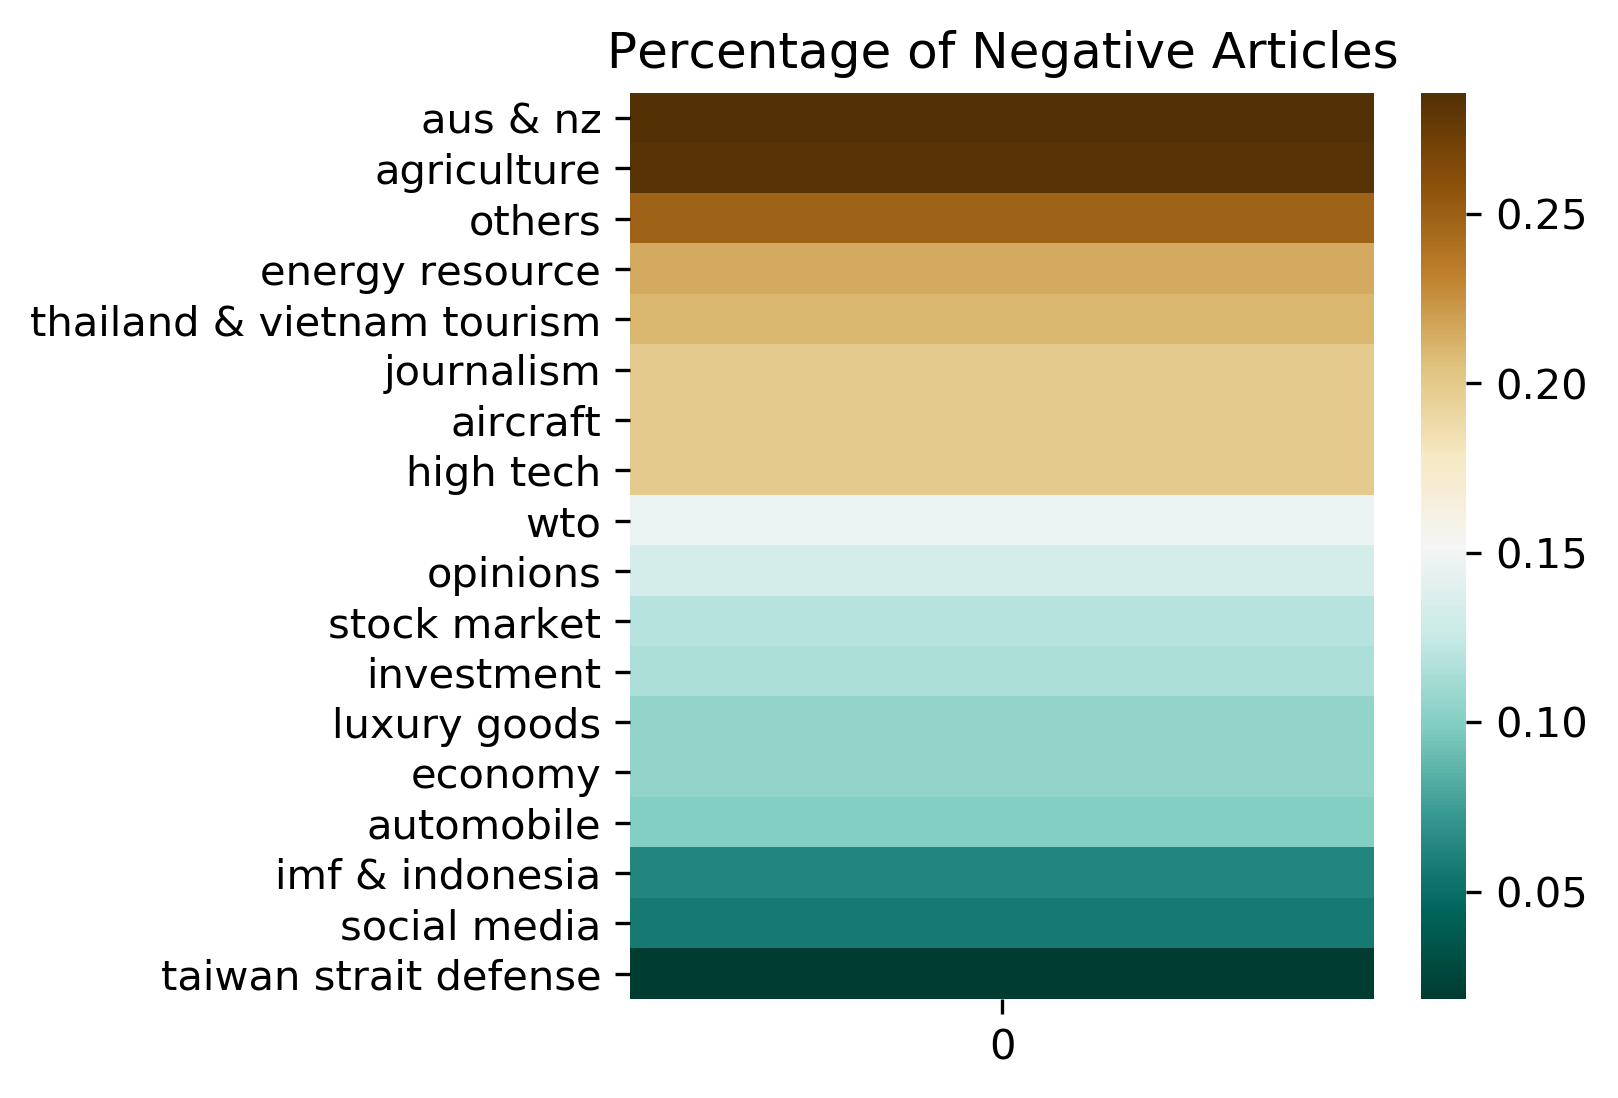

In [71]:
plt.figure(figsize=(4,4),dpi=300)
plt.title('Percentage of Negative Articles')
sns.heatmap(df_neg_percent[:, np.newaxis],yticklabels=df_neg_percent.index,cmap='BrBG_r');

In [72]:
df_sentiment.polarity.quantile([0.15,0.5,0.85])

0.15    0.000000
0.50    0.058679
0.85    0.126105
Name: polarity, dtype: float64

In [73]:
df_sentiment['polarity_adj'] = 0

In [74]:
neg = df_sentiment.polarity <= 0
df_sentiment.loc[neg,'polarity_adj'] = -1

In [75]:
pos = df_sentiment.polarity >= 0.126
df_sentiment.loc[pos,'polarity_adj'] = 1

In [76]:
df_sentiment.head(25)

,polarity,subjectivity,topic,polarity_adj
0,0.074998,0.373739,others,0
1,0.104214,0.391857,others,0
2,0.109005,0.416962,others,0
3,0.124369,0.433062,investment,0
4,0.053152,0.232551,investment,0
5,0.079303,0.382005,stock market,0
6,0.101319,0.383750,others,0
7,0.032547,0.336845,others,0
8,0.128093,0.314048,stock market,1
9,0.040611,0.420554,opinions,0


In [77]:
df_metadata = pd.concat([df,df_sentiment],axis=1)
df_metadata.drop(columns=['content','polarity','subjectivity'],axis=1,inplace=True)
df_metadata.rename(columns={'polarity_adj':'sentiment'},inplace=True)

In [78]:
df_metadata.head()

,description,source,title,url,publish_date,topic,sentiment
0,"Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04,others,0
1,"Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06,others,0
2,"Asian stocks sank on Monday as fears of faster rate hikes in the United States and uncertainty around the Sino-U.S. trade war deterred investment in riskier assets, while sterling jumped to a two-week high on hopes of an orderly Brexit.",Reuters,"Asian shares sink as risk sentiment sours, pound hits 2-week top",https://www.reuters.com/article/us-global-markets/asian-shares-sink-as-risk-sentiment-sours-pound-hits-2-week-top-idUSKCN1N90PQ,2018-11-05,others,0
3,The biggest macro theme remains the trade war after recent warnings from major names including the IMF’s Christine Lagarde and former U.S. Treasury Secretary Hank Paulson. Coming UpThe Fed’s next rate decision is Thursday.,Yahoo.com,Stocks Climb as Investors Cheer On U.S. Gridlock: Markets Wrap,https://www.yahoo.com/news/asia-stocks-start-mixed-u-220816159.html,2018-11-07,investment,0
4,"Trade war fears, ongoing Brexit negotiations, and the crisis surrounding Italy’s budget are all dragging on the German economy. Traditionally strong exports have disappointed in four of last six months. New rules on emissions for automakers aren't helping. Eu…",Business Insider,Germany's economy is getting hammered by the rest of the world's problems,https://www.businessinsider.com/germanys-economy-is-getting-hit-by-the-rest-of-the-worlds-problems-2018-11,2018-11-08,investment,0


In [79]:
df_metadata.to_csv('data/metadata.csv')

In [80]:
df_sentiment.topic.value_counts()

investment                    3194
opinions                       657
energy resource                451
wto                            274
others                         269
taiwan strait defense          163
stock market                   160
economy                        123
agriculture                    113
social media                   107
luxury goods                   104
automobile                      70
thailand & vietnam tourism      57
aus & nz                        42
imf & indonesia                 32
high tech                       30
aircraft                        25
journalism                      20
Name: topic, dtype: int64

In [81]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 5890
Data columns (total 4 columns):
polarity        5891 non-null float64
subjectivity    5891 non-null float64
topic           5891 non-null object
polarity_adj    5891 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 390.1+ KB


In [82]:
df_effect = df_sentiment.groupby('topic')['polarity_adj'].mean().sort_values()

In [83]:
df_effect

topic
luxury goods                 -0.461538
agriculture                  -0.318584
others                       -0.267658
wto                          -0.211679
energy resource              -0.159645
aus & nz                     -0.142857
thailand & vietnam tourism   -0.122807
journalism                   -0.100000
stock market                 -0.087500
imf & indonesia              -0.062500
opinions                     -0.050228
social media                  0.018692
automobile                    0.028571
high tech                     0.033333
investment                    0.036631
economy                       0.073171
aircraft                      0.200000
taiwan strait defense         0.779141
Name: polarity_adj, dtype: float64

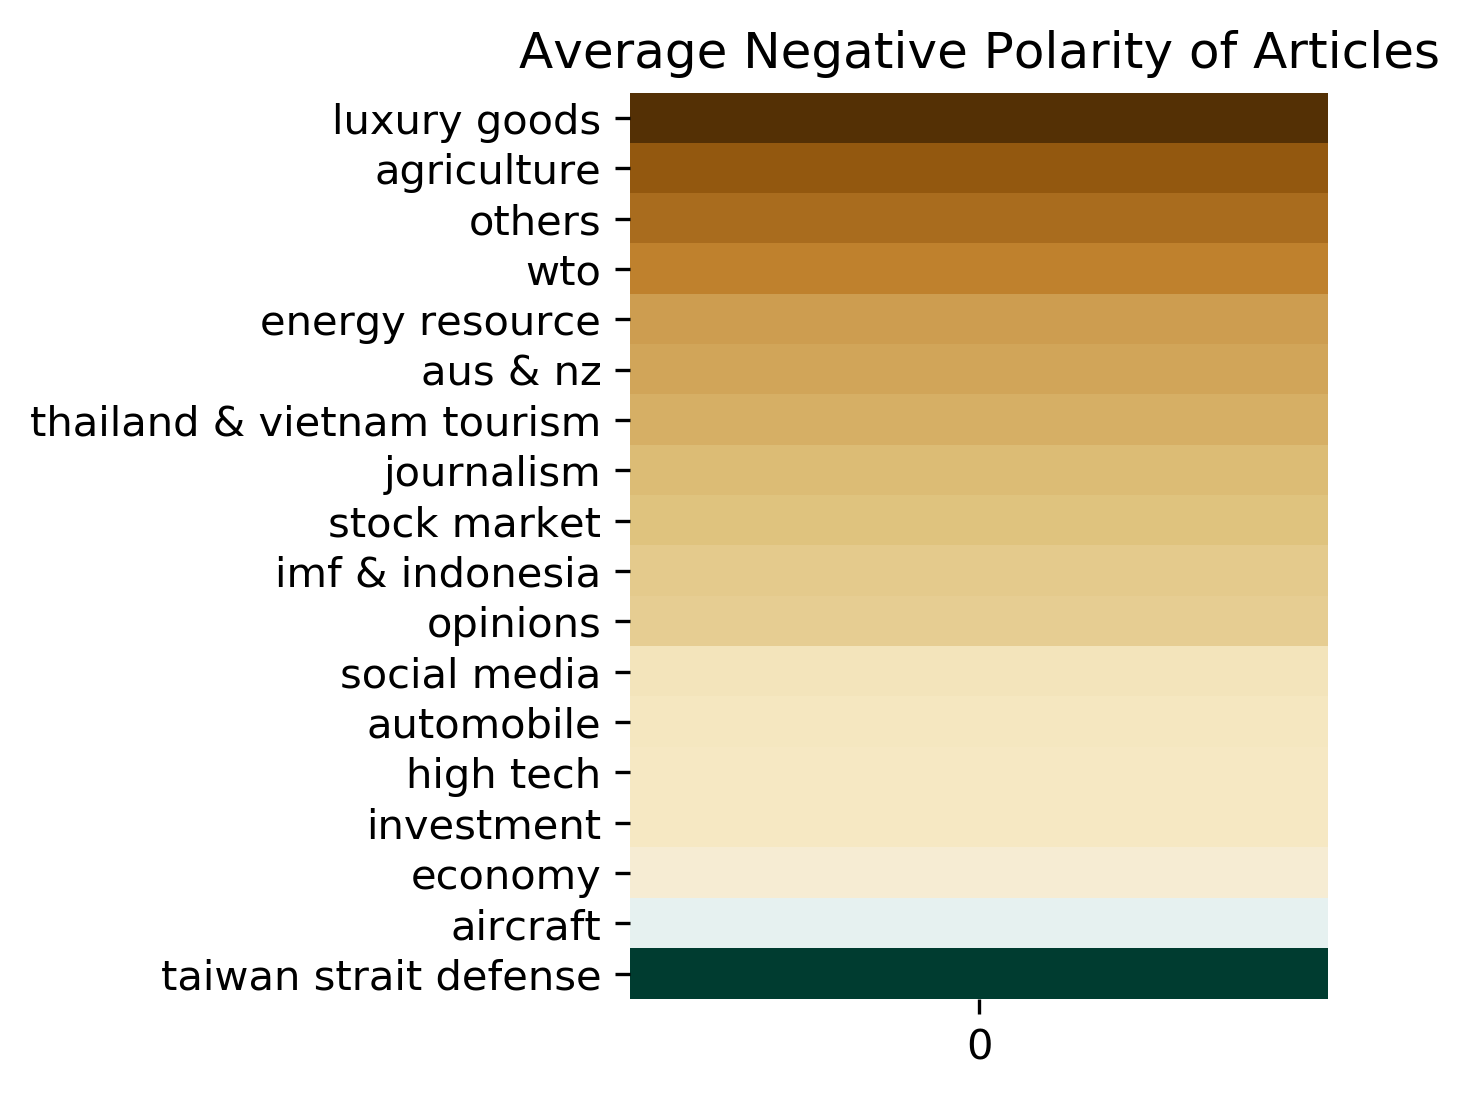

In [84]:
plt.figure(figsize=(3,4), dpi=300)
plt.title('Average Negative Polarity of Articles')
sns.heatmap(df_effect[:, np.newaxis],yticklabels=df_effect.index,cmap='BrBG',cbar=False);

### Similarity Analysis

In [85]:
tfidf = TfidfVectorizer(max_df=0.9,min_df=3,ngram_range=(1,2))

In [86]:
Xt = tfidf.fit_transform(content)

In [87]:
Xt.toarray().shape

(5891, 172416)

In [88]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
Xt_array = Xt.toarray()

In [90]:
dim = Xt_array.shape[0]

In [195]:
indexs = doc_topic_prob.idxmax(axis=0).sort_values().index.format()

In [91]:
a = list(doc_topic_prob.idxmax(axis=0).sort_values())
a

[97,
 111,
 182,
 490,
 572,
 604,
 901,
 1533,
 2051,
 2504,
 2643,
 3522,
 3991,
 4233,
 4534,
 5090,
 5844]

In [202]:
col_dict = {}
for i in range(len(a)):
    col_dict[i] = indexs[i]
col_dict

{0: 'luxury goods',
 1: 'wto',
 2: 'agriculture',
 3: 'opinions',
 4: 'taiwan strait defense',
 5: 'aus & nz',
 6: 'automobile',
 7: 'energy resource',
 8: 'journalism',
 9: 'investment',
 10: 'high tech',
 11: 'economy',
 12: 'social media',
 13: 'imf & indonesia',
 14: 'stock market',
 15: 'thailand & vietnam tourism',
 16: 'aircraft'}

In [92]:
typical_doc = Xt_array[a]
sim_matrix = cosine_similarity(typical_doc,Xt_array)

In [93]:
sim_matrix2 = cosine_similarity(Xt_array,Xt_array)

In [94]:
sim_matrix2.shape

(5891, 5891)

In [95]:
df_similarity = pd.DataFrame(sim_matrix2)

In [97]:
df_similarity.to_csv('data/similarity.csv')

In [98]:
df_similarity2 = pd.DataFrame(sim_matrix)

In [100]:
df_similarity2.to_csv('data/similarity2.csv')

In [187]:
def timeplot(index):
    temp = pd.concat([df.publish_date,df_similarity[index]],axis=1)
    temp.sort_values('publish_date',ascending=True,inplace=True)
    plt.figure(figsize=(5,3), dpi=300)
    plt.scatter(temp.publish_date,temp[index],alpha=0.3)
    x = np.linspace(1,6,6)
    labels = ['10-10','10-15','10-20','10-25','10-30','11-04']
    plt.xticks(rotation=60);

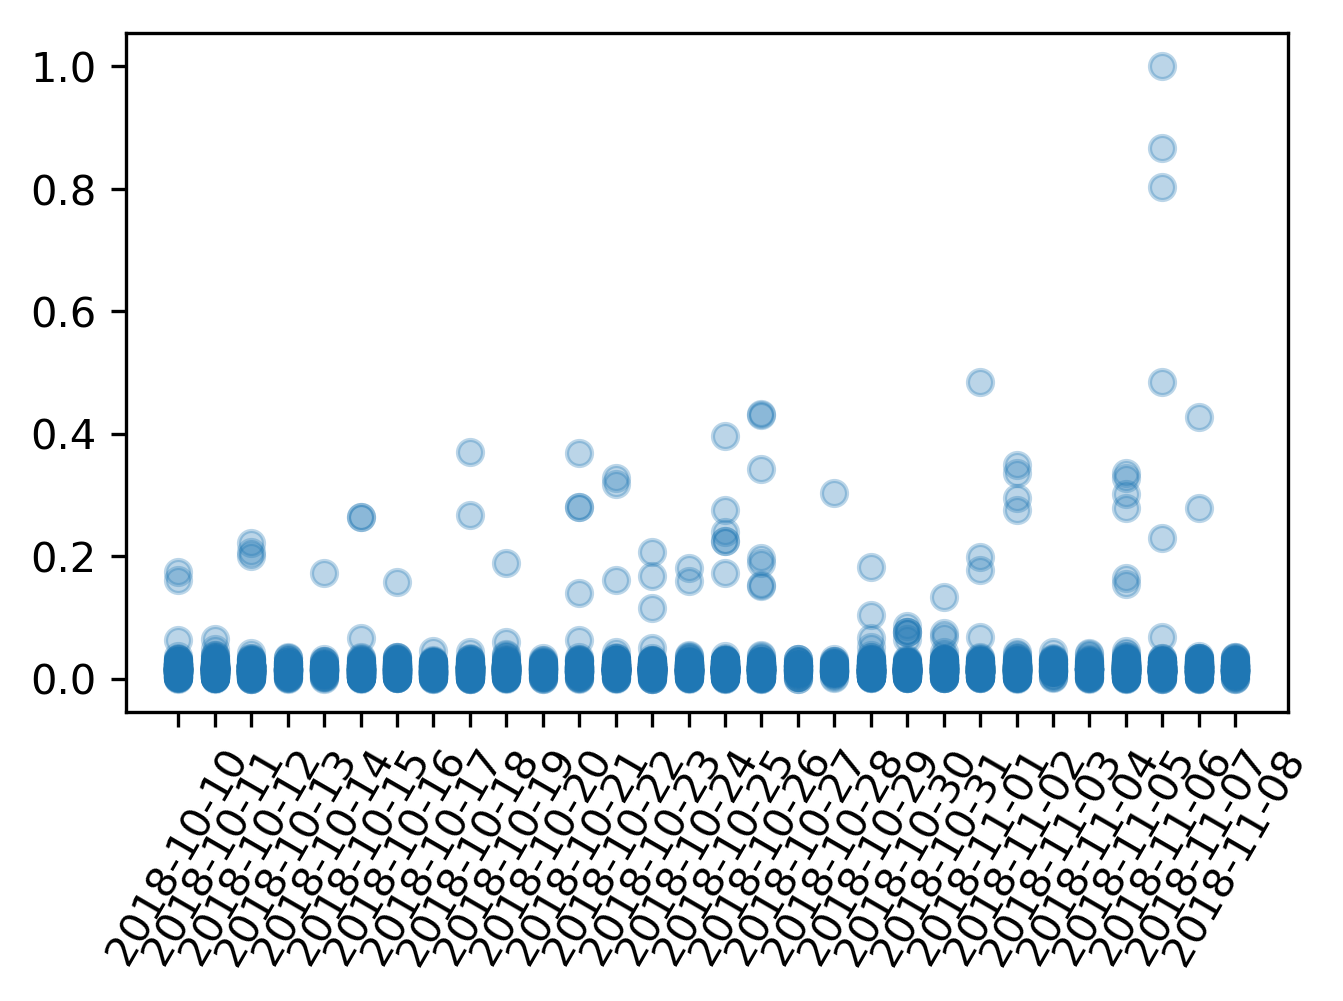

In [188]:
timeplot(901)

In [198]:
temp = df_similarity2.apply(lambda x: round(x,3)).T

In [205]:
temp.rename(mapper=col_dict,axis=1,inplace=True)

In [207]:
df_timeplot = pd.concat([df_metadata,temp], axis=1)

In [208]:
df_timeplot.head(2)

,description,source,title,url,publish_date,topic,sentiment,luxury goods,wto,agriculture,...,energy resource,journalism,investment,high tech,economy,social media,imf & indonesia,stock market,thailand & vietnam tourism,aircraft
0,"Trade frictions with the United States and accusations of industrial espionage are set to cast a cloud over China's largest aerospace meeting this week, as suppliers consider what the country's slowing economy could mean for booming jet demand.",Reuters,"Trade war, spy claims cloud horizon for China airshow",https://www.reuters.com/article/us-china-airshow-preview/trade-war-spy-claims-cloud-horizon-for-china-airshow-idUSKCN1N9026,2018-11-04,others,0,0.012,0.023,0.030,...,0.023,0.024,0.021,0.007,0.003,0.051,0.020,0.023,0.039,0.006
1,"Europe's Airbus SE indicated on Tuesday that it did not expect a sales windfall from trade tensions between China and the United States, with the manufacturer's China head saying there would be ""no winner"" from a prolonged economic conflict.",Reuters,"Airbus China CEO says ""no winner"" from U.S.-China trade war",https://www.reuters.com/article/us-china-airshow-airbus/airbus-china-ceo-says-no-winner-from-u-s-china-trade-war-idUSKCN1NB0GP,2018-11-06,others,0,0.022,0.051,0.028,...,0.021,0.016,0.022,0.009,0.002,0.041,0.015,0.016,0.044,0.003


In [209]:
df_timeplot.to_csv('data/tableau.csv')